In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
columns = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes', 'venomous','fins','legs','tail','domestic', 'catsize','class_type']
data = pd.read_csv('zoo_data.csv', names=columns)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [21]:
x = data.drop('class_type', axis=1)
y = data['class_type']

x1, x2, y1, y2 = train_test_split(x, y, test_size=0.2)
model = DecisionTreeClassifier().fit(x1, y1)
y_pred = model.predict(x2)

print(classification_report(y2, y_pred, zero_division=1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         4
           7       0.33      0.33      0.33         3

    accuracy                           0.81        21
   macro avg       0.83      0.78      0.77        21
weighted avg       0.84      0.81      0.80        21



In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

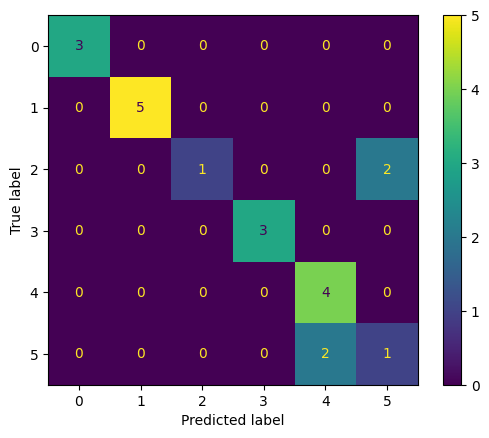

In [28]:
mat = ConfusionMatrixDisplay(confusion_matrix(y2, y_pred))
mat.plot()

In [36]:
print(export_text(model, feature_names = columns[:len(columns)]))

ValueError: feature_names must contain 16 elements, got 17

In [34]:
help(export_text)

Help on function export_text in module sklearn.tree._export:

export_text(decision_tree, *, feature_names=None, class_names=None, max_depth=10, spacing=3, decimals=2, show_weights=False)
    Build a text report showing the rules of a decision tree.
    
    Note that backwards compatibility may not be supported.
    
    Parameters
    ----------
    decision_tree : object
        The decision tree estimator to be exported.
        It can be an instance of
        DecisionTreeClassifier or DecisionTreeRegressor.
    
    feature_names : array-like of shape (n_features,), default=None
        An array containing the feature names.
        If None generic names will be used ("feature_0", "feature_1", ...).
    
    class_names : array-like of shape (n_classes,), default=None
        Names of each of the target classes in ascending numerical order.
        Only relevant for classification and not supported for multi-output.
    
        - if `None`, the class names are delegated to `decis